In [1]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
from collections import defaultdict
from IPython.display import clear_output
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


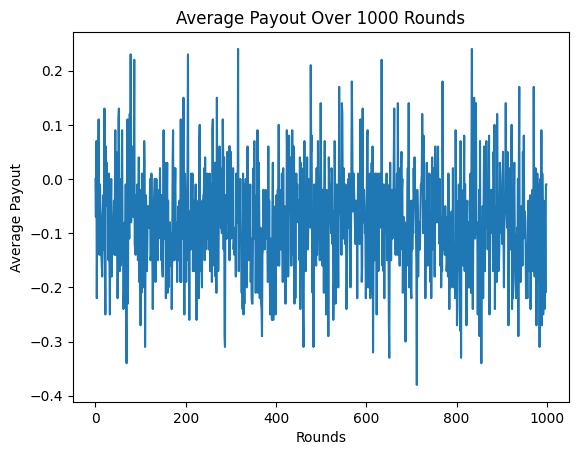

Win Percentage: 41.25%
Loss Percentage: 49.18%
Draw Percentage: 9.56%
Average payout after 1000 rounds: -0.0793


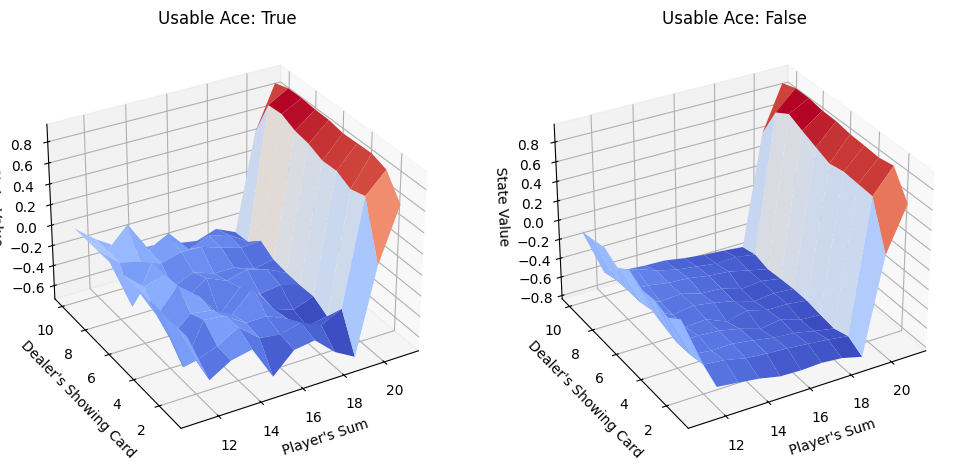

In [30]:
# def naive_baseline_policy(observation):
#     """ Naive baseline strategy: Hit if sum < 16, otherwise stick."""
#     player_sum, dealer_card, usable_ace = observation
#     return 1 if player_sum < 16 else 0  # 1 = Hit, 0 = Stick

# def simulate_baseline(env, players=100, rounds=1000):
#     """ Simulate baseline strategy and track outcomes."""
#     payouts = np.zeros((players, rounds))
#     outcomes = {'wins': 0, 'losses': 0, 'draws': 0}

#     for player in range(players):
#         for round in range(rounds):
#             observation, info = env.reset()
#             done = False

#             while not done:
#                 action = naive_baseline_policy(observation)
#                 observation, reward, terminated, truncated, info = env.step(action)
#                 done = terminated or truncated

#             payouts[player, round] = reward

#             if reward == 1:
#                 outcomes['wins'] += 1
#             elif reward == -1:
#                 outcomes['losses'] += 1
#             else:
#                 outcomes['draws'] += 1

#     return payouts, outcomes

# def plot_baseline_results(payouts, outcomes, rounds):
#     """ Plot the baseline strategy performance."""
#     average_payouts = np.mean(payouts, axis=0)
#     plt.plot(average_payouts)
#     plt.xlabel('Rounds')
#     plt.ylabel('Average Payout')
#     plt.title(f'Average Payout Over {rounds} Rounds')
#     plt.show()

#     total_games = payouts.shape[0] * payouts.shape[1]
#     win_percentage = outcomes['wins'] / total_games * 100
#     loss_percentage = outcomes['losses'] / total_games * 100
#     draw_percentage = outcomes['draws'] / total_games * 100

#     print(f"Win Percentage: {win_percentage:.2f}%")
#     print(f"Loss Percentage: {loss_percentage:.2f}%")
#     print(f"Draw Percentage: {draw_percentage:.2f}%")
#     print(f"Average payout after {rounds} rounds: {np.mean(average_payouts):.4f}")

# def generate_episode(env, policy):
#     """ Generate an episode following the given policy."""
#     episode = []
#     state, _ = env.reset()

#     while True:
#         action = policy(state)  # Choose action based on policy
#         next_state, reward, terminated, truncated, _ = env.step(action)
#         episode.append((state, action, reward))

#         if terminated or truncated:
#             break
#         state = next_state

#     return episode

# def first_visit_mc_prediction(env, num_episodes=100000, gamma=1.0):
#     """ Monte Carlo first-visit prediction for estimating state-value function. """
#     value_table = defaultdict(float)  # State-value function
#     returns = defaultdict(list)  # Store returns for averaging

#     def policy(state):
#         """ A simple policy: Stick if sum >= 20, otherwise hit."""
#         return 0 if state[0] >= 20 else 1

#     for _ in range(num_episodes):
#         episode = generate_episode(env, policy)
#         visited_states = set()
#         G = 0

#         for t in range(len(episode) - 1, -1, -1):  # Reverse order for return computation
#             state, action, reward = episode[t]
#             G = gamma * G + reward  # Compute return

#             if state not in visited_states:  # First-visit check
#                 returns[state].append(G)
#                 value_table[state] = np.mean(returns[state])
#                 visited_states.add(state)

#     return value_table

# def plot_blackjack_values(V):
#     def get_Z(x, y, usable_ace):
#         return V.get((x, y, usable_ace), 0)

#     fig = plt.figure(figsize=(12, 6))

#     for i, usable_ace in enumerate([True, False]):
#         ax = fig.add_subplot(1, 2, i+1, projection='3d')
#         x_range = np.arange(11, 22)
#         y_range = np.arange(1, 11)
#         X, Y = np.meshgrid(x_range, y_range)
#         Z = np.array([get_Z(x, y, usable_ace) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

#         ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)
#         ax.set_xlabel("Player's Sum")
#         ax.set_ylabel("Dealer's Showing Card")
#         ax.set_zlabel("State Value")
#         ax.set_title(f"Usable Ace: {usable_ace}")
#         ax.view_init(30, -120)

#     plt.show()

# # Initialize Blackjack environment
# env = gym.make('Blackjack-v1', natural=False, sab=False)

# # Run Baseline Strategy Simulation
# payouts, outcomes = simulate_baseline(env)
# plot_baseline_results(payouts, outcomes, 1000)

# # Run First-Visit Monte Carlo Prediction
# value_function = first_visit_mc_prediction(env)
# plot_blackjack_values(value_function)


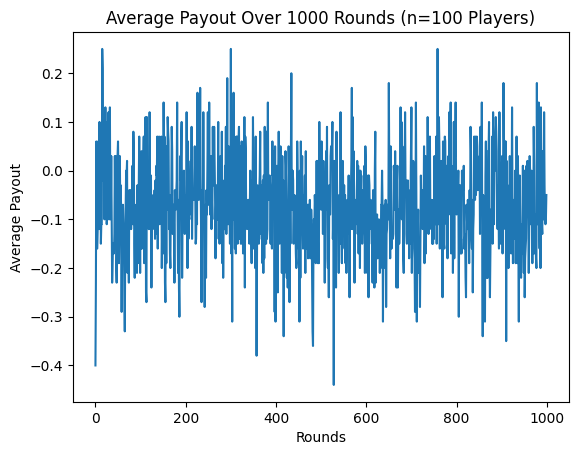

Win Percentage: 41.64%
Loss Percentage: 48.72%
Draw Percentage: 9.65%
Average payout of a player after 1000 rounds is -0.0708


In [26]:
env = gym.make('Blackjack-v1', natural=False, sab=False)

def naive_baseline_policy(observation):
    player_sum, dealer_card, usable_ace = observation
    return 1 if player_sum < 16 else 0  # 1 = Hit, 0 = Stick

# Parameters
players = 100
rounds = 1000

payouts = np.zeros((players, rounds))
outcomes = {'wins': 0, 'losses': 0, 'draws': 0}  # Track wins, losses, and draws

for player in range(players):
    for round in range(rounds):
        observation, info = env.reset()
        done = False

        while not done:
            action = naive_baseline_policy(observation)
            observation, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

        payouts[player, round] = reward

        if reward == 1:
            outcomes['wins'] += 1
        elif reward == -1:
            outcomes['losses'] += 1
        else:
            outcomes['draws'] += 1

env.close()

average_payouts = np.mean(payouts, axis=0)

plt.plot(average_payouts)
plt.xlabel('Rounds')
plt.ylabel('Average Payout')
plt.title(f'Average Payout Over {rounds} Rounds (n={players} Players)')
plt.show()

total_games = players * rounds
win_percentage = outcomes['wins'] / total_games * 100
loss_percentage = outcomes['losses'] / total_games * 100
draw_percentage = outcomes['draws'] / total_games * 100

print(f"Win Percentage: {win_percentage:.2f}%")
print(f"Loss Percentage: {loss_percentage:.2f}%")
print(f"Draw Percentage: {draw_percentage:.2f}%")

final_average_payout = np.mean(average_payouts)
print(f"Average payout of a player after {rounds} rounds is {final_average_payout:.4f}")

In [28]:
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# def plot_blackjack_values(V):

#     def get_Z(x, y, usable_ace):
#         if (x,y,usable_ace) in V:
#             return V[x,y,usable_ace]
#         else:
#             return 0

#     def get_figure(usable_ace, ax):
#         x_range = np.arange(11, 22)
#         y_range = np.arange(1, 11)
#         X, Y = np.meshgrid(x_range, y_range)

#         Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

#         surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
#         ax.set_xlabel('Player\'s Current Sum')
#         ax.set_ylabel('Dealer\'s Showing Card')
#         ax.set_zlabel('State Value')
#         ax.view_init(ax.elev, -120)

#     fig = plt.figure(figsize=(20, 20))
#     ax = fig.add_subplot(211, projection='3d')
#     ax.set_title('Usable Ace')
#     get_figure(True, ax)
#     ax = fig.add_subplot(212, projection='3d')
#     ax.set_title('No Usable Ace')
#     get_figure(False, ax)
#     plt.show()

# def plot_policy(policy):

#     def get_Z(x, y, usable_ace):
#         if (x,y,usable_ace) in policy:
#             return policy[x,y,usable_ace]
#         else:
#             return 1

#     def get_figure(usable_ace, ax):
#         x_range = np.arange(11, 22)
#         y_range = np.arange(10, 0, -1)
#         X, Y = np.meshgrid(x_range, y_range)
#         Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
#         surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
#         plt.xticks(x_range)
#         plt.yticks(y_range)
#         plt.gca().invert_yaxis()
#         ax.set_xlabel('Player\'s Current Sum')
#         ax.set_ylabel('Dealer\'s Showing Card')
#         ax.grid(color='w', linestyle='-', linewidth=1)
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size="5%", pad=0.1)
#         cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
#         cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])

#     fig = plt.figure(figsize=(15, 15))
#     ax = fig.add_subplot(121)
#     ax.set_title('Usable Ace')
#     get_figure(True, ax)
#     ax = fig.add_subplot(122)
#     ax.set_title('No Usable Ace')
#     get_figure(False, ax)
#     plt.show()

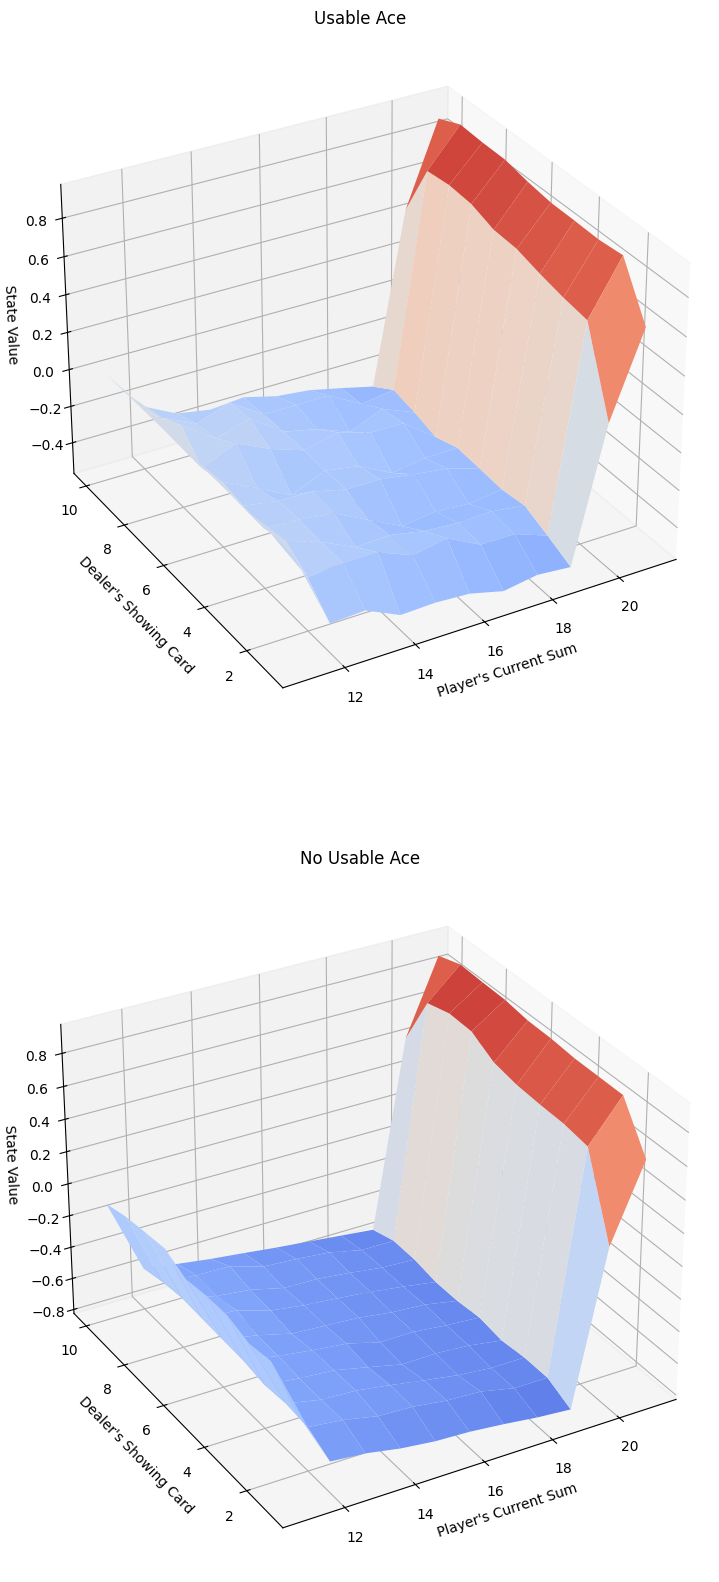

In [29]:
# plot_blackjack_values(value_function)

Win Percentage: 42.62%
Loss Percentage: 48.88%
Draw Percentage: 8.49%


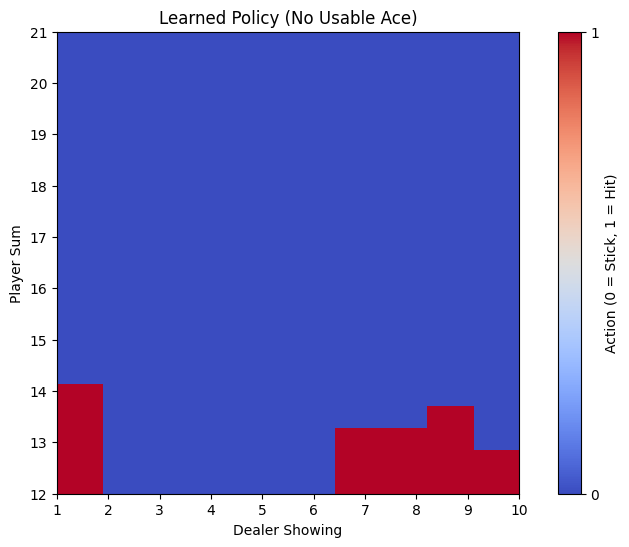

In [2]:
env = gym.make('Blackjack-v1', natural=False, sab=False)

Q = defaultdict(lambda: np.zeros(env.action_space.n))  # Q(s, a)
returns = defaultdict(list)
policy = defaultdict(int)

num_episodes = 500000
epsilon = 0.9
epsilon_decay = 0.99999
min_epsilon = 0.01
gamma = 1.0

def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return policy[state]

# Monte Carlo On-Policy Control
for episode in range(num_episodes):
    episode_history = []
    state, _ = env.reset()
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode_history.append((state, action, reward))
        state = next_state
        done = terminated or truncated

    # Update Q-values and policy
    G = 0  # Return
    for t in reversed(range(len(episode_history))):
        state, action, reward = episode_history[t]
        G = gamma * G + reward
        if not (state, action) in [(x[0], x[1]) for x in episode_history[:t]]:
            returns[(state, action)].append(G)
            Q[state][action] = np.mean(returns[(state, action)])
            policy[state] = np.argmax(Q[state])  # Update policy to be greedy

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

env.close()

Win Percentage: 42.95%
Loss Percentage: 48.79%
Draw Percentage: 8.26%


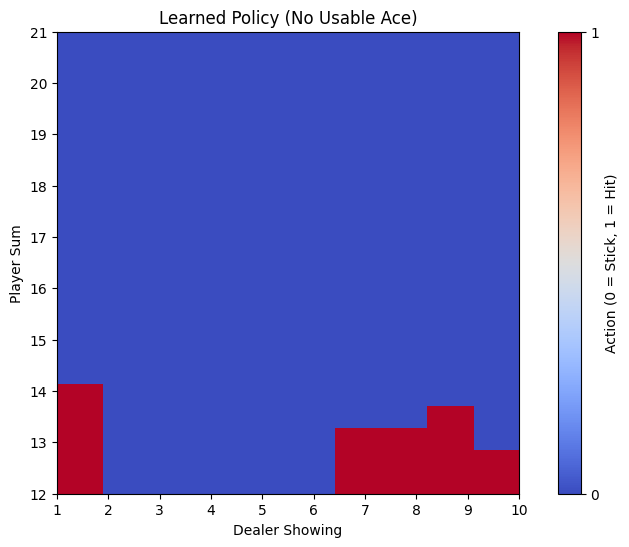

In [3]:
# Function to evaluate the trained policy
def evaluate_policy(policy, num_episodes=100000):
    wins = 0
    losses = 0
    draws = 0

    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False

        while not done:
            action = policy[state]
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

        if reward == 1:
            wins += 1
        elif reward == -1:
            losses += 1
        else:
            draws += 1

    win_percentage = wins / num_episodes * 100
    loss_percentage = losses / num_episodes * 100
    draw_percentage = draws / num_episodes * 100

    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Loss Percentage: {loss_percentage:.2f}%")
    print(f"Draw Percentage: {draw_percentage:.2f}%")

evaluate_policy(policy)

def plot_policy(policy):
    # Extract policy for states without a usable ace
    policy_no_ace = np.zeros((21, 10))
    for state, action in policy.items():
        player_sum, dealer_card, usable_ace = state
        if not usable_ace and player_sum >= 12:
            policy_no_ace[player_sum - 12, dealer_card - 1] = action

    plt.figure(figsize=(10, 6))
    plt.imshow(policy_no_ace, cmap='coolwarm', origin='lower', extent=[1, 10, 12, 21])
    plt.colorbar(ticks=[0, 1], label='Action (0 = Stick, 1 = Hit)')
    plt.xlabel('Dealer Showing')
    plt.ylabel('Player Sum')
    plt.title('Learned Policy (No Usable Ace)')
    plt.show()

plot_policy(policy)

Win Percentage: 43.01%
Loss Percentage: 47.85%
Draw Percentage: 9.14%


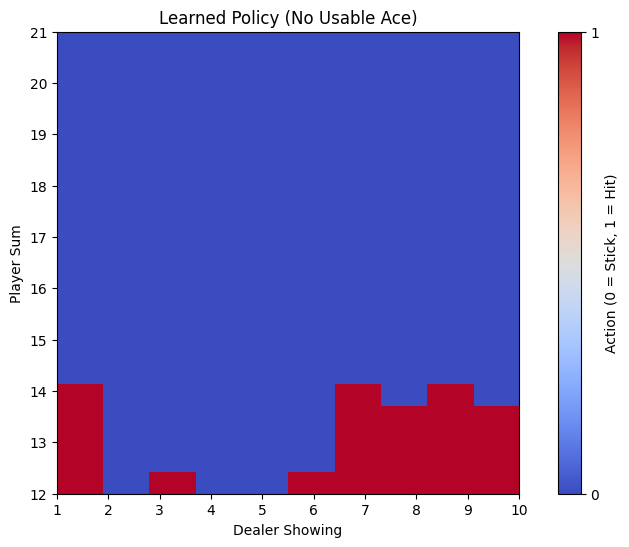

In [ ]:
env = gym.make('Blackjack-v1', natural=False, sab=False)

Q = defaultdict(lambda: np.zeros(env.action_space.n))  # Q(s, a)
C = defaultdict(lambda: np.zeros(env.action_space.n))  # Cumulative weights for importance sampling

num_episodes = 500000
epsilon = 1.0
epsilon_decay = 0.99999
min_epsilon = 0.01
gamma = 1.0

def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

# Monte Carlo Off-Policy Control with Importance Sampling
for episode in range(num_episodes):
    episode_history = []
    state, _ = env.reset()
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode_history.append((state, action, reward))
        state = next_state
        done = terminated or truncated

    G = 0  # Return
    W = 1  # Importance sampling weight

    for t in reversed(range(len(episode_history))):
        state, action, reward = episode_history[t]
        G = gamma * G + reward
        C[state][action] += W
        Q[state][action] += (W / C[state][action]) * (G - Q[state][action])

        if action != np.argmax(Q[state]):
            break

        W *= 1 / (1 - epsilon + epsilon / env.action_space.n)

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

env.close()

In [ ]:
def evaluate_policy(Q, num_episodes=100000):
    wins = 0
    losses = 0
    draws = 0

    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False

        while not done:
            action = np.argmax(Q[state])  # Greedy policy
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

        if reward == 1:
            wins += 1
        elif reward == -1:
            losses += 1
        else:
            draws += 1

    win_percentage = wins / num_episodes * 100
    loss_percentage = losses / num_episodes * 100
    draw_percentage = draws / num_episodes * 100

    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Loss Percentage: {loss_percentage:.2f}%")
    print(f"Draw Percentage: {draw_percentage:.2f}%")

evaluate_policy(Q)

def plot_policy(Q):
    policy_no_ace = np.zeros((21, 10))
    for state in Q:
        player_sum, dealer_card, usable_ace = state
        if not usable_ace and player_sum >= 12:
            policy_no_ace[player_sum - 12, dealer_card - 1] = np.argmax(Q[state])

    plt.figure(figsize=(10, 6))
    plt.imshow(policy_no_ace, cmap='coolwarm', origin='lower', extent=[1, 10, 12, 21])
    plt.colorbar(ticks=[0, 1], label='Action (0 = Stick, 1 = Hit)')
    plt.xlabel('Dealer Showing')
    plt.ylabel('Player Sum')
    plt.title('Learned Policy (No Usable Ace)')
    plt.show()

plot_policy(Q)